# **ALL MODELS - PRE GAN**

## **Import Dependencies**

In [6]:
!rm -r /kaggle/working

rm: cannot remove '/kaggle/working': Device or resource busy


In [7]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers as L
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [9]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# **Data Loader**

In [10]:
# DataLoader
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/pjt-gtsrb/GTSRB',
    batch_size=128,
    image_size=(81, 81),
    label_mode="categorical",
    labels = "inferred",
    seed=42,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/gtsrb-climatic',
    batch_size=128,
    image_size=(81, 81),
    label_mode="categorical",
    labels = "inferred",
    seed=42,
)

Found 39209 files belonging to 43 classes.
Found 39209 files belonging to 43 classes.


In [11]:
train_data.as_numpy_iterator().__next__()[0].shape

(128, 81, 81, 3)

In [12]:
train_data.as_numpy_iterator().__next__()[1].shape

(128, 43)

# **Model Prep**

In [13]:
# Create custom F1 Score Metrics

from keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [14]:
steps_per_epoch = len(train_data)
EPOCHS = 128

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=4, min_lr=0.000001)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=8,# if val loss decreases for 8 epochs in a row, stop training
                                                  restore_best_weights = True)

# **Model Creations**

In [15]:
# Model

def create_model_1(shape=(81, 81, 3)):
    base_model = EfficientNetV2B0(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="EfficientNetV2B0")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

In [16]:
# Model

def create_model_2(shape=(81, 81, 3)):
    base_model = EfficientNetB0(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="EfficientNetB0")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

In [17]:
# Model

def create_model_3(shape=(81, 81, 3)):
    base_model = InceptionV3(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="InceptionV3")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

In [18]:
# Model

def create_model_4(shape=(81, 81, 3)):
    base_model = ResNet50(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="ResNet50")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

In [19]:
# Model

def create_model_5(shape=(81, 81, 3)):
    base_model = Xception(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="Xception")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

In [20]:
# Model

def create_model_6(shape=(81, 81, 3)):
    base_model = MobileNetV2(
        include_top = False,
        input_shape = shape,
        weights = "imagenet",
    )
    
    base_model.trainable = False
    for layer in base_model.layers[-7:]:
#         print(layer)
        layer.trainable = True
        
    x = base_model.output
    x = L.Flatten(name="flatten")(x)
    x = L.Dense(512, activation="relu", name="Dense-1")(x)
    x = L.Dropout(0.4, name="Final-Dropout")(x)
    x = L.Dense(43, activation="softmax", name="Output-layer")(x)
    
    model = tf.keras.models.Model(base_model.input, x, name="MobileNetV2")
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics = ["accuracy",tf.keras.metrics.AUC(name="auc"),
                               tf.keras.metrics.Recall(name="recall"),
                               tf.keras.metrics.Precision(name="precision"),
                              f1_score]
    )
    
    return model

# **Train Models**

In [21]:
model_1 = create_model_1()

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_1.save("/kaggle/working/EfficientNetV2B0.h5")
pd.DataFrame(history_1.history).to_csv("/kaggle/working/History-EfficientNetV2B0.csv")

24274472/24274472 [==============================] - 2s 0us/step
Epoch 1/128


2024-01-08 16:17:42.338163: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNetV2B0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


307/307 [==============================] - 100s 289ms/step - loss: 0.5788 - accuracy: 0.8239 - auc: 0.9900 - recall: 0.7822 - precision: 0.8876 - f1_score: 0.8231 - val_loss: 0.9070 - val_accuracy: 0.7482 - val_auc: 0.9745 - val_recall: 0.7156 - val_precision: 0.8192 - val_f1_score: 0.7639 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 22s 71ms/step - loss: 0.1576 - accuracy: 0.9485 - auc: 0.9982 - recall: 0.9406 - precision: 0.9573 - f1_score: 0.9488 - val_loss: 0.9513 - val_accuracy: 0.7771 - val_auc: 0.9673 - val_recall: 0.7591 - val_precision: 0.8128 - val_f1_score: 0.7849 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 23s 74ms/step - loss: 0.1066 - accuracy: 0.9648 - auc: 0.9989 - recall: 0.9605 - precision: 0.9699 - f1_score: 0.9651 - val_loss: 0.9610 - val_accuracy: 0.7777 - val_auc: 0.9661 - val_recall: 0.7615 - val_precision: 0.8095 - val_f1_score: 0.7847 - lr: 0.0010
Epoch 4/128
307/307 [==============================] - 22s 71ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model_2 = create_model_2()

# Fit the model
history_2 = model_2.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_2.save("/kaggle/working/EfficientNetB0.h5")
pd.DataFrame(history_2.history).to_csv("/kaggle/working/History-EfficientNetB0.csv")

16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/128


2024-01-08 17:07:33.435229: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNetB0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


307/307 [==============================] - 46s 118ms/step - loss: 0.6656 - accuracy: 0.8011 - auc: 0.9867 - recall: 0.7574 - precision: 0.8714 - f1_score: 0.8032 - val_loss: 1.3963 - val_accuracy: 0.6776 - val_auc: 0.9477 - val_recall: 0.6499 - val_precision: 0.7424 - val_f1_score: 0.6928 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 35s 114ms/step - loss: 0.2161 - accuracy: 0.9314 - auc: 0.9972 - recall: 0.9210 - precision: 0.9459 - f1_score: 0.9334 - val_loss: 1.3646 - val_accuracy: 0.7069 - val_auc: 0.9466 - val_recall: 0.6891 - val_precision: 0.7552 - val_f1_score: 0.7205 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 34s 111ms/step - loss: 0.1583 - accuracy: 0.9508 - auc: 0.9977 - recall: 0.9446 - precision: 0.9590 - f1_score: 0.9517 - val_loss: 1.3217 - val_accuracy: 0.7255 - val_auc: 0.9473 - val_recall: 0.7098 - val_precision: 0.7686 - val_f1_score: 0.7378 - lr: 0.0010
Epoch 4/128
307/307 [==============================] - 24s 77ms/ste

In [23]:
model_3 = create_model_3()

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_3.save("/kaggle/working/InceptionV3.h5")
pd.DataFrame(history_3.history).to_csv("/kaggle/working/History-InceptionV3.csv")

87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/128
307/307 [==============================] - 31s 79ms/step - loss: 5.3957 - accuracy: 0.0910 - auc: 0.6597 - recall: 0.0191 - precision: 0.2891 - f1_score: 0.0343 - val_loss: 3.8110 - val_accuracy: 0.1044 - val_auc: 0.6761 - val_recall: 0.0149 - val_precision: 0.5531 - val_f1_score: 0.0287 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 24s 77ms/step - loss: 3.2765 - accuracy: 0.1269 - auc: 0.7616 - recall: 0.0300 - precision: 0.7177 - f1_score: 0.0573 - val_loss: 3.3845 - val_accuracy: 0.1224 - val_auc: 0.7293 - val_recall: 0.0175 - val_precision: 0.9476 - val_f1_score: 0.0344 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 28s 89ms/step - loss: 3.1474 - accuracy: 0.1472 - auc: 0.7843 - recall: 0.0407 - precision: 0.7743 - f1_score: 0.0769 - val_loss: 3.3033 - val_accuracy: 0.1386 - val_auc: 0.7452 - val_recall: 0.0201 - val_precision: 0.9493 - val_f1_score: 0.0391 - lr: 

In [24]:
model_4 = create_model_4()

# Fit the model
history_4 = model_4.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_4.save("/kaggle/working/ResNet50.h5")
pd.DataFrame(history_4.history).to_csv("/kaggle/working/History-ResNet50.csv")

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/128
307/307 [==============================] - 37s 98ms/step - loss: 1.0081 - accuracy: 0.7225 - auc: 0.9774 - recall: 0.6425 - precision: 0.8389 - f1_score: 0.7156 - val_loss: 1.8911 - val_accuracy: 0.5389 - val_auc: 0.9218 - val_recall: 0.4877 - val_precision: 0.6567 - val_f1_score: 0.5595 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 28s 92ms/step - loss: 0.2404 - accuracy: 0.9199 - auc: 0.9979 - recall: 0.9011 - precision: 0.9405 - f1_score: 0.9203 - val_loss: 1.9045 - val_accuracy: 0.5880 - val_auc: 0.9177 - val_recall: 0.5520 - val_precision: 0.6801 - val_f1_score: 0.6090 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 28s 92ms/step - loss: 0.1307 - accuracy: 0.9566 - auc: 0.9990 - recall: 0.9487 - precision: 0.9645 - f1_score: 0.9565 - val_loss: 2.5463 - val_accuracy: 0.5583 - val_auc: 0.8784 - val_recall: 0.5404 - val_precision: 0.6091 - val_f1_score: 0.5725 - lr: 

In [25]:
model_5 = create_model_5()

# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_5.save("/kaggle/working/Xception.h5")
pd.DataFrame(history_5.history).to_csv("/kaggle/working/History-Xception.csv")

83683744/83683744 [==============================] - 4s 0us/step
Epoch 1/128
307/307 [==============================] - 39s 107ms/step - loss: 1.9965 - accuracy: 0.4288 - auc: 0.9293 - recall: 0.2724 - precision: 0.7437 - f1_score: 0.3740 - val_loss: 4.6213 - val_accuracy: 0.2399 - val_auc: 0.7678 - val_recall: 0.1766 - val_precision: 0.3246 - val_f1_score: 0.2286 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 32s 102ms/step - loss: 0.9578 - accuracy: 0.7009 - auc: 0.9825 - recall: 0.6016 - precision: 0.8361 - f1_score: 0.6977 - val_loss: 3.9084 - val_accuracy: 0.3554 - val_auc: 0.8046 - val_recall: 0.2922 - val_precision: 0.5372 - val_f1_score: 0.3775 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 32s 105ms/step - loss: 0.6227 - accuracy: 0.8025 - auc: 0.9912 - recall: 0.7417 - precision: 0.8850 - f1_score: 0.8065 - val_loss: 4.4695 - val_accuracy: 0.3537 - val_auc: 0.7951 - val_recall: 0.2989 - val_precision: 0.4343 - val_f1_score: 0.3538 - l

In [26]:
model_6 = create_model_6()

# Fit the model
history_6 = model_6.fit(
    train_data,
    epochs = EPOCHS,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_data,
    validation_steps = len(val_data),
    callbacks = [reduce_lr],
)

model_6.save("/kaggle/working/MobileNetV2.h5")
pd.DataFrame(history_6.history).to_csv("/kaggle/working/History-MobileNetV2.csv")

9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/128
307/307 [==============================] - 25s 64ms/step - loss: 2.1622 - accuracy: 0.3889 - auc: 0.9192 - recall: 0.2185 - precision: 0.6923 - f1_score: 0.3263 - val_loss: 9.8214 - val_accuracy: 0.0553 - val_auc: 0.5783 - val_recall: 0.0143 - val_precision: 0.0681 - val_f1_score: 0.0236 - lr: 0.0010
Epoch 2/128
307/307 [==============================] - 19s 63ms/step - loss: 1.4518 - accuracy: 0.5397 - auc: 0.9660 - recall: 0.3790 - precision: 0.7694 - f1_score: 0.5061 - val_loss: 11.2743 - val_accuracy: 0.0578 - val_auc: 0.5807 - val_recall: 0.0056 - val_precision: 0.2119 - val_f1_score: 0.0108 - lr: 0.0010
Epoch 3/128
307/307 [==============================] - 20s 63ms/step - loss: 1.1760 - accuracy: 0.6173 - auc: 0.9772 - recall: 0.4820 - precision: 0.7932 - f1_score: 0.5989 - val_loss: 5.4042 - val_accuracy: 0.0697 - val_auc: 0.6647 - val_recall: 0.0353 - val_precision: 0.1063 - val_f1_score: 0.0529 - lr: 0

# **Results**

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.saving import load_model

class_names = ['Ahead only', 'Beware of icesnow', 'Bicycles crossing', 'Bumpy road', 'Children crossing', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'End no passing veh _ 3.5 tons', 'End of no passing', 'End of speed limit (80kmh)', 'End speed + passing limits', 'General caution', 'Go straight or left', 'Go straight or right', 'Keep left', 'Keep right', 'No entry', 'No passing', 'No passing veh over 3.5 tons', 'No vehicles', 'Pedestrians', 'Priority road', 'Right-of-way at intersection', 'Road narrows on the right', 'Road work', 'Roundabout mandatory', 'Slippery road', 'Speed limit (100kmh)', 'Speed limit (120kmh)', 'Speed limit (20kmh)', 'Speed limit (30kmh)', 'Speed limit (50kmh)', 'Speed limit (60kmh)', 'Speed limit (70kmh)', 'Speed limit (80kmh)', 'Stop', 'Traffic signals', 'Turn left ahead', 'Turn right ahead', 'Veh _ 3.5 tons prohibited', 'Wild animals crossing', 'Yield']

# **EfficientNetV2B0**

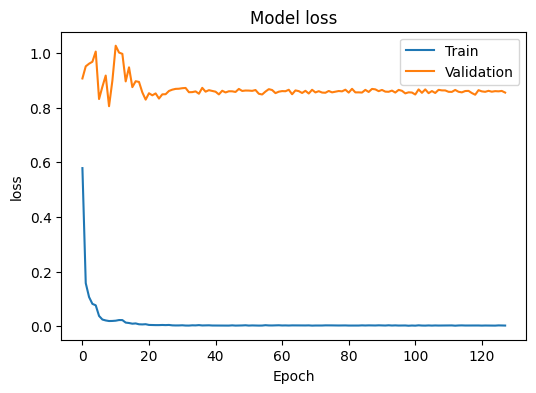

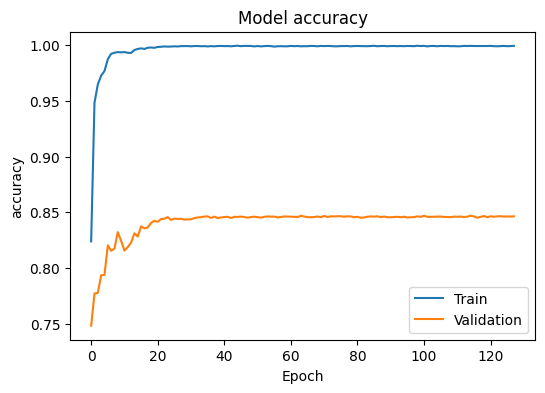

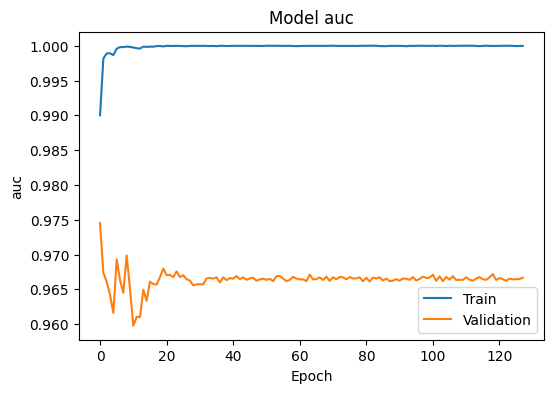

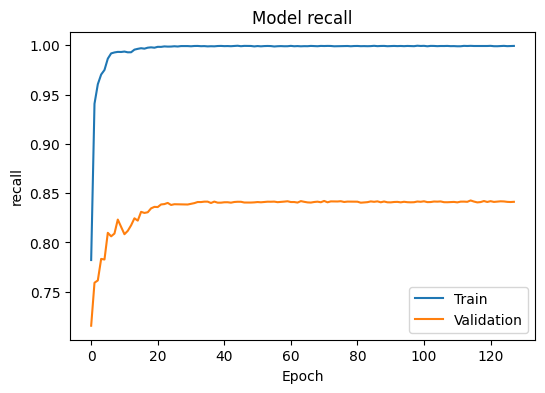

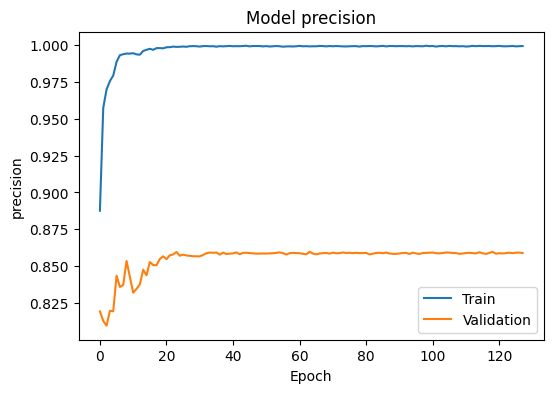

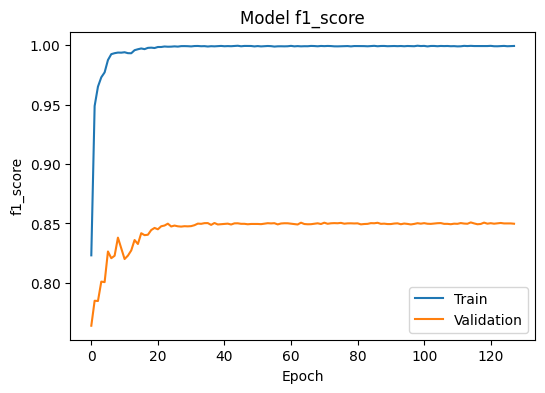

In [28]:
metrics = list(history_1.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_1.history[metric])
        plt.plot(history_1.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **EfficientNetB0**

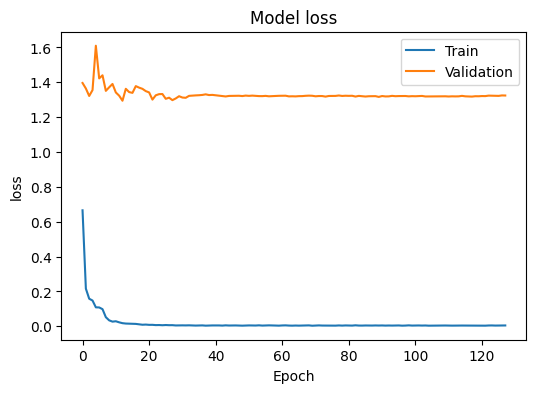

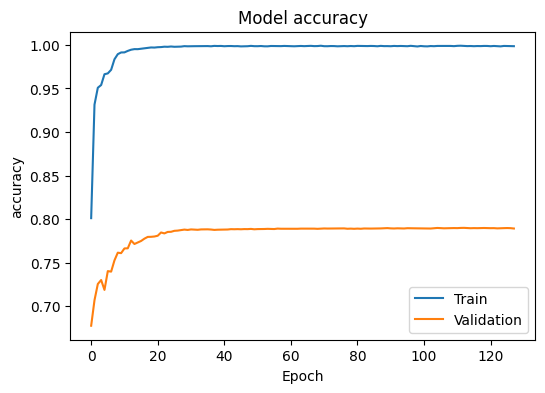

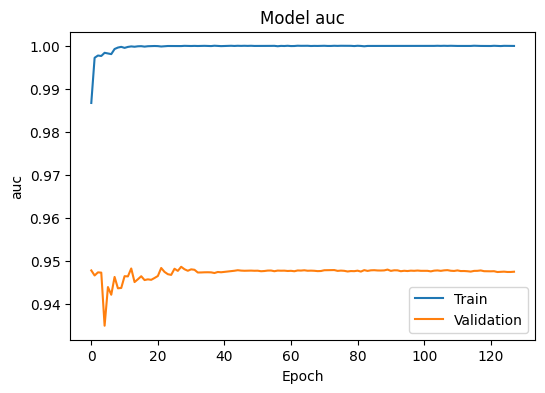

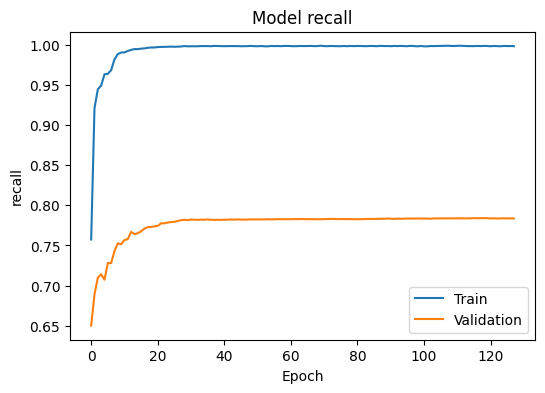

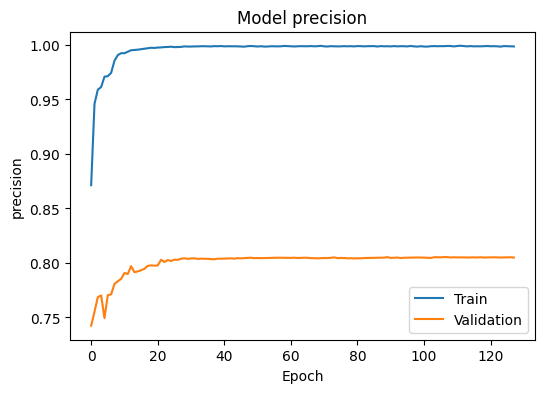

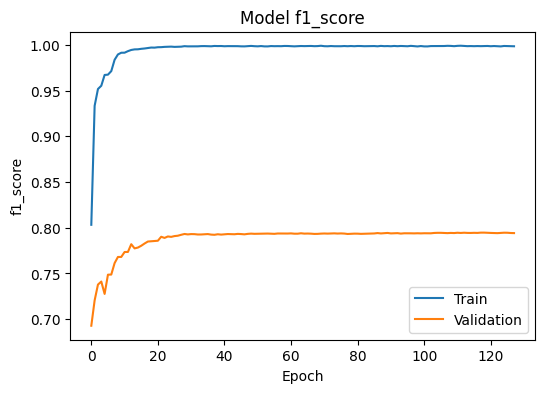

In [29]:
metrics = list(history_2.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_2.history[metric])
        plt.plot(history_2.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **InceptionV3**

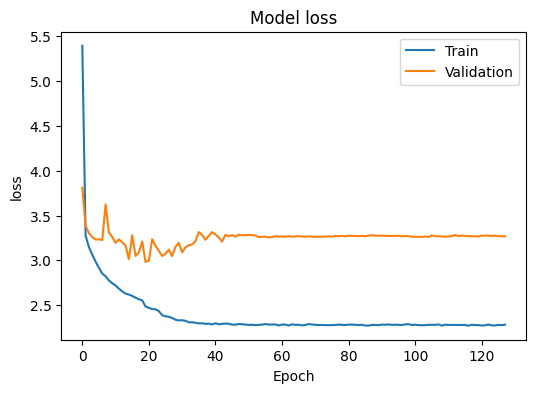

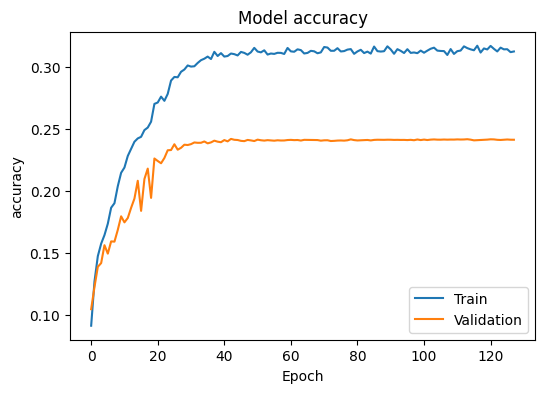

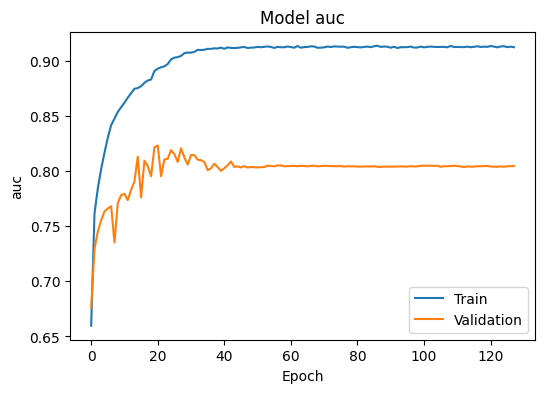

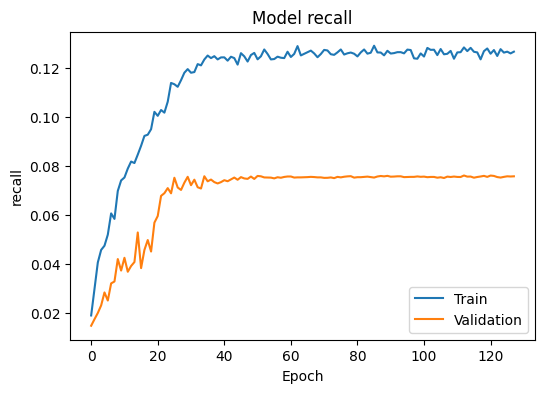

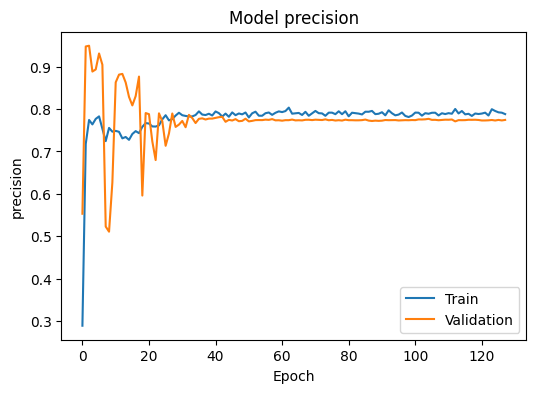

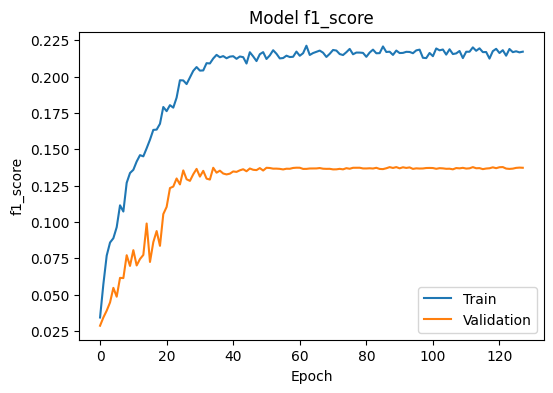

In [30]:
metrics = list(history_3.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_3.history[metric])
        plt.plot(history_3.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **ResNet50**

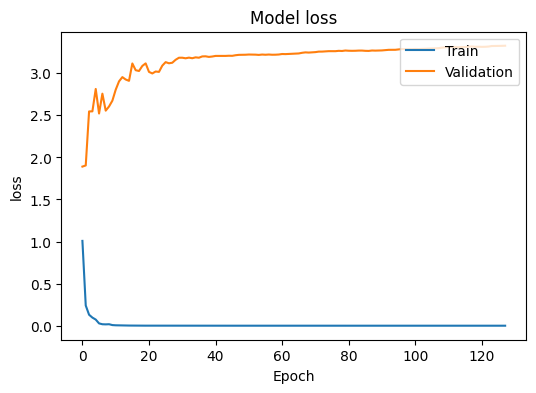

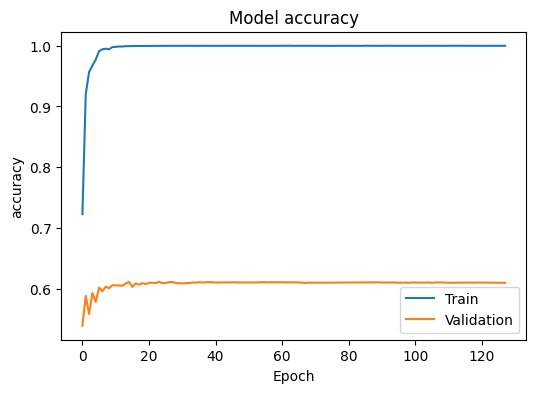

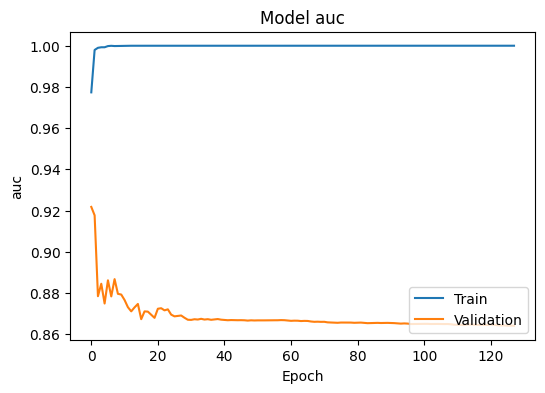

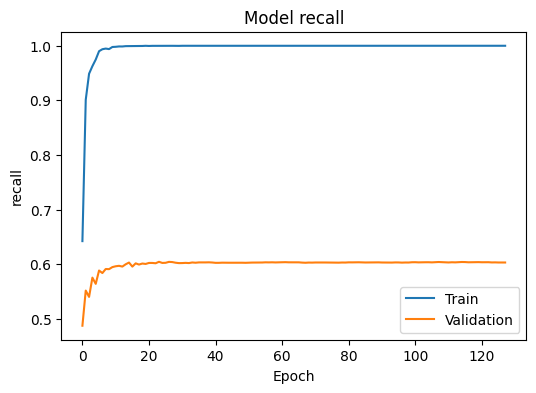

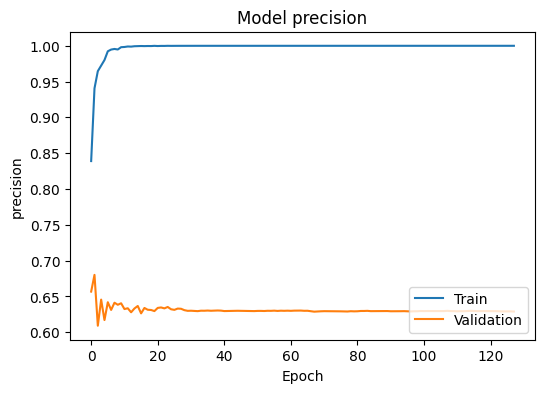

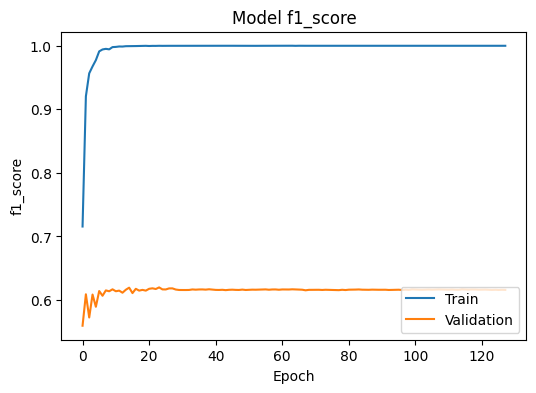

In [31]:
metrics = list(history_4.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_4.history[metric])
        plt.plot(history_4.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **Xception**

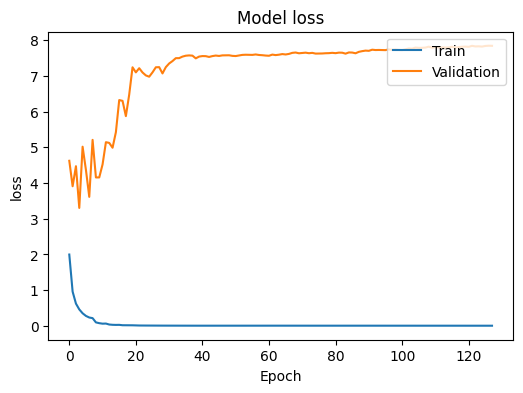

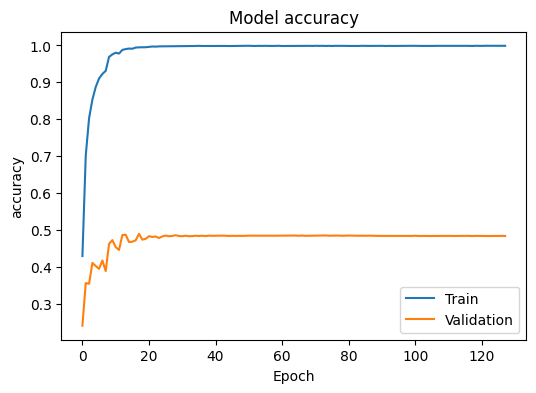

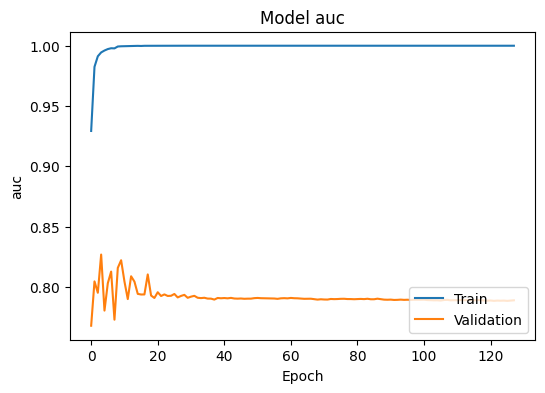

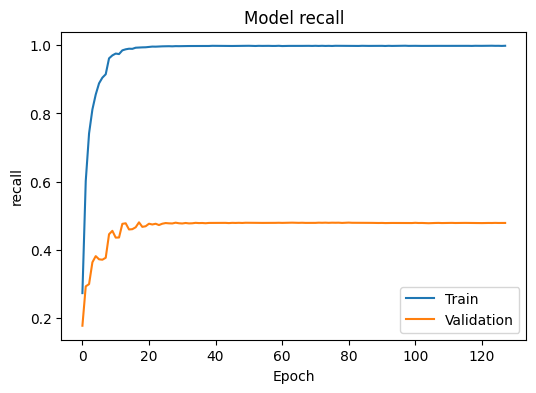

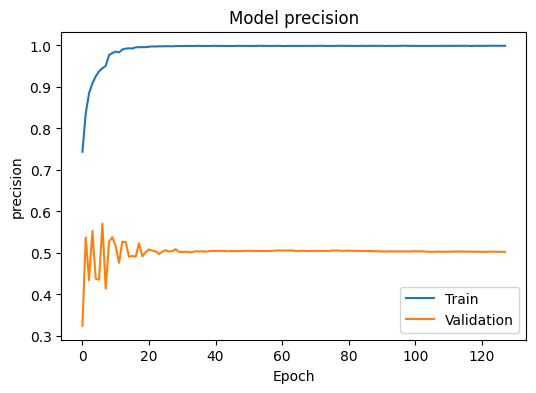

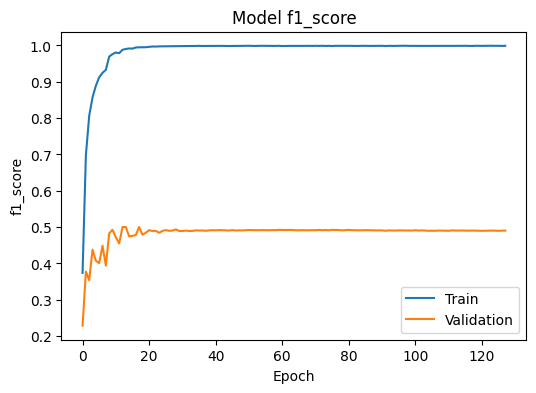

In [32]:
metrics = list(history_5.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_5.history[metric])
        plt.plot(history_5.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **MobileNetV2**

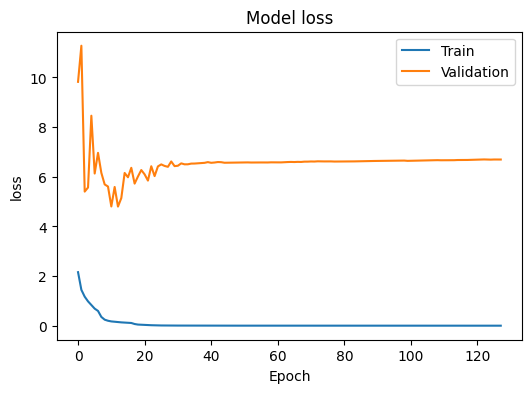

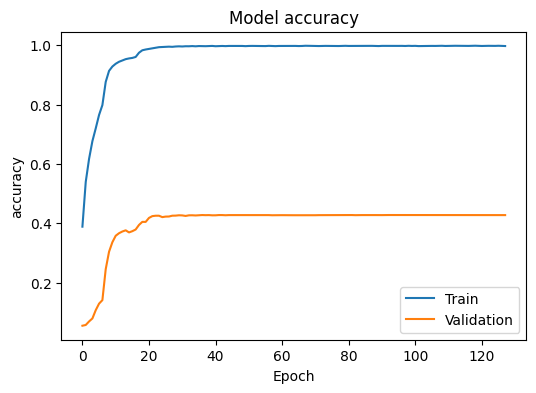

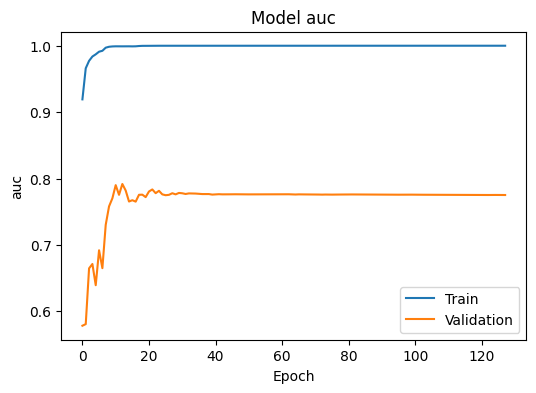

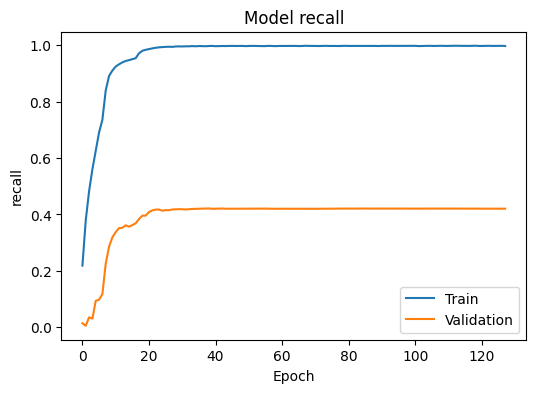

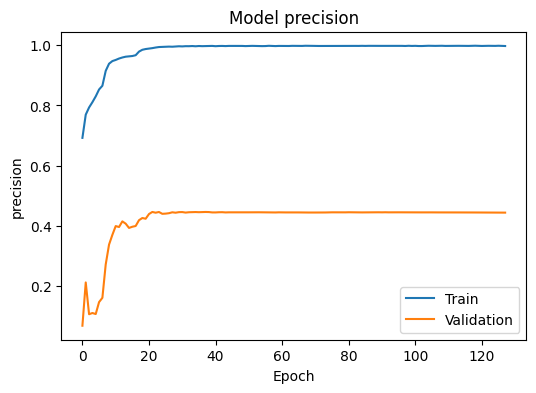

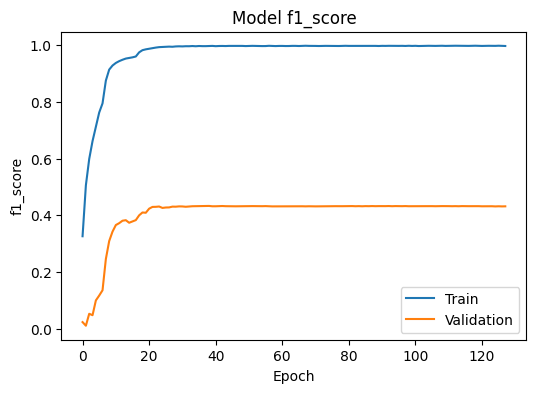

In [33]:
metrics = list(history_6.history.keys())

for metric in metrics:
    if metric.startswith('val')==False and metric!='lr':
        plt.figure(figsize=(6, 4))
        plt.plot(history_6.history[metric])
        plt.plot(history_6.history['val_'+metric])
        plt.title('Model '+metric)
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        if metric.endswith('loss'):
            plt.legend(['Train', 'Validation'], loc='upper right')
        else:
            plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()